In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
# Import countries polygons
fp = os.path.join('data', 'ne_50m_admin_0_countries', 'ne_50m_admin_0_countries.shp')
countries = gpd.read_file(fp)
# Simplify column names
countries.columns = countries.columns.str.lower()
# Select columns for analysis
countries = countries[['admin', 'type', 'geometry']]
countries.head()

,admin,type,geometry
0,Zimbabwe,Sovereign country,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,Sovereign country,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,Sovereign country,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Vietnam,Sovereign country,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Venezuela,Sovereign country,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


In [4]:
# Import Arctic communities data
fp = os.path.join('data', 'arctic_communities.geojson')
countries = gpd.read_file(fp)

communities.head()

DriverError: Failed to open dataset (flags=68): data/arctic_communities.geojson

In [12]:
# Import country names from URL
URL = 'https://raw.githubusercontent.com/MEDS-eds-220/MEDS-eds-220-course/refs/heads/main/book/chapters/lesson-12-merge-data/country_names.csv'
country_names = pd.read_csv(URL)
country_names.head()

,country,admin
0,RU,Russia
1,LV,Latvia
2,EE,Estonia
3,LT,Lithuania
4,SE,Sweden


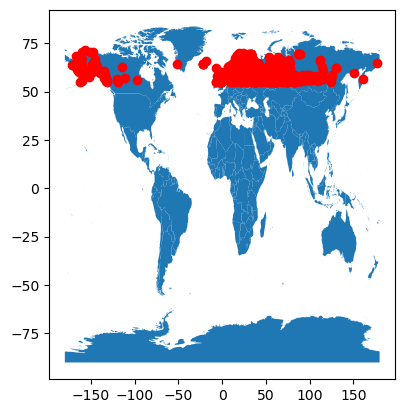

In [11]:
# Verify CRSs match
assert countries.crs == communities.crs

fig, ax = plt.subplots()
countries.plot(ax=ax)
communities.plot(ax=ax, color='red')
plt.show()

In [14]:
# Create data frame with number of communities per country
n_comms = (communities.groupby('country')
                      .size()
                      .reset_index(name='n_communities'))
# Number of Arctic communities per country
n_comms

,country,n_communities
0,AX,1
1,BY,8
2,CA,7
3,DK,72
4,EE,14
5,FI,98
6,FO,1
7,GB,96
8,GL,1
9,IS,5


In [15]:
common_columns = set(countries.columns).intersection(n_comms.columns)

# Check if there are any common columns
if len(common_columns) != 0:
    print(f"Common columns: {common_columns}")
else:
    print("No common columns")

No common columns


Wrap up the previous code into a function called check_common_columns that prints a message depending of whether two data frames have common columns or not. Don’t forget to include a docstring!



In [21]:
def common_names(df1, df2):
    common_columns = set(df1.columns).intersection(df2.columns)

    if len(common_columns) != 0:
        print(f"Common columns: {common_columns}")
    else:
        print("No common columns")

In [25]:
common_names(countries, n_comms)

No common columns


In [26]:
n_comms = pd.merge(n_comms,
                   country_names,
                   how='left',
                   on='country')
n_comms


NameError: name 'check_common_columns' is not defined

Create a new variable named arctic_countries which is the result of an inner join between our countries and n_comms dataframes. The inner joun will merge the subset of rows that have matches in both the left table and the right table.

In [29]:
arctic_countries = pd.merge(n_comms,
                   country_names,
                   how='inner',
                   on='country')
arctic_countries

,country,n_communities,admin_x,admin_y,admin
0,AX,1,Aland Islands,Aland Islands,Aland Islands
1,BY,8,Belarus,Belarus,Belarus
2,CA,7,Canada,Canada,Canada
3,DK,72,Denmark,Denmark,Denmark
4,EE,14,Estonia,Estonia,Estonia
5,FI,98,Finland,Finland,Finland
6,FO,1,Faroe Islands,Faroe Islands,Faroe Islands
7,GB,96,United Kingdom,United Kingdom,United Kingdom
8,GL,1,Greenland,Greenland,Greenland
9,IS,5,Iceland,Iceland,Iceland


In [8]:
# Check Aland Islands is nowhere in data frame
'Aland Islands' not in countries.values

True

In [9]:
arctic_countries = arctic_countries.set_index('admin')
arctic_countries.at['Finland', 'n_communities'] += 1

NameError: name 'arctic_countries' is not defined

In [10]:
arctic_countries

NameError: name 'arctic_countries' is not defined

NameError: name 'arctic_countries' is not defined

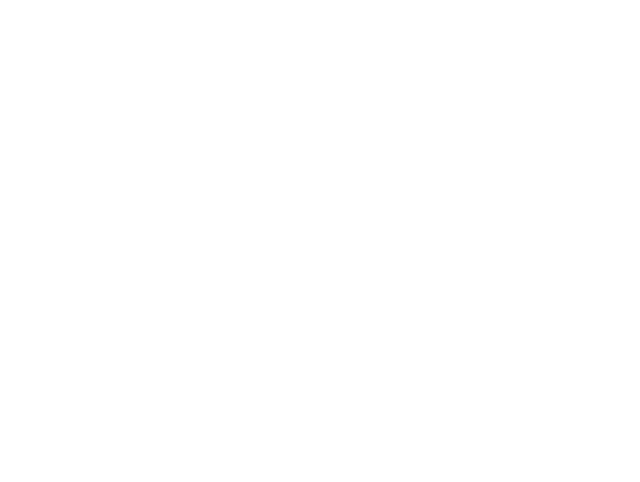

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of communities
# Plot with refined color and edge style
arctic_countries.plot(
    ax=ax,
    column='n_communities',
    cmap='PuBuGn',
    legend=True,
    edgecolor="0.6",
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of Arctic Communities",
        "orientation": "horizontal",
        "pad": 0.05
    }
)

# Add title and subtitle for better context
ax.set_title('Distribution of Arctic Communities', fontsize=18, weight='bold', pad=15)

plt.show()